In [1]:
# Pour que les changements dans les modules importés soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

In [2]:
from functions import *

In [3]:
import sys, os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from matplotlib import gridspec 
# https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['axes.grid'] = True

In [6]:
project_path = "../HMAD/projects/AA0075/OPENFACE"
ofo_path = os.path.join(project_path, "processed", "AA0075_ofo.csv")
nods_path = "../UEDialogue2020-SR/AnnotationsNods/AA0075_FML_MP_simplified_nod.txt"
pyr_path = os.path.join(project_path, "tables", "itdcomplete.txt")
au_path = os.path.join(project_path, "tables", "audf.txt")

## Data Import

In [7]:
nods = pd.read_csv(nods_path, sep="\t")
nods.head()

,tmin,tmax,annot,value
0,3.610,4.750,Complexe,Nod
1,7.780,8.640,Nod,Nod
2,9.280,10.080,Complexe,Nod
3,12.520,14.550,Nod,Nod
4,19.825,22.025,Nod,Nod


In [8]:
nods.groupby(by=['annot', 'value']).count()

,,tmin,tmax
annot,value,,
Backward,No_nod,2,2
Complexe,Nod,9,9
Froncement de sourcils,No_nod,12,12
Haussement de sourcils,No_nod,1,1
Nod,Nod,19,19
Tilt,No_nod,1,1


In [9]:
pyr = pd.read_csv(pyr_path, sep="\t")
pyr.head()

,frame,time,timem,times,confidence,pitch,yaw,roll,MOx,MOy,...,rP65y,rP66x,rP66y,rP67x,rP67y,rP68x,rP68y,eaX,eaY,gde
0,1,0.00,0,0.00,0.98,-6.0161,5.6150,2.2345,852.5146,555.0926,...,-0.3212,-0.2228,0.7368,-0.1370,0.7757,-0.1604,0.8427,0.9998,1.0011,1.625166
1,2,0.04,0,0.04,0.98,-6.0734,4.1826,2.7502,853.1868,555.0756,...,-0.3221,0.4100,0.5190,0.4083,0.3917,0.5352,0.4064,0.9966,1.0024,1.614559
2,3,0.08,0,0.08,0.98,-5.6150,5.2139,1.0886,853.7894,555.3585,...,-0.3257,-0.5958,0.5826,-0.4135,0.4554,-0.1066,0.4617,0.9932,0.9945,1.045137
3,4,0.12,0,0.12,0.98,-5.7296,4.5264,2.0054,852.8113,555.8667,...,-0.2983,-0.2241,0.4778,-0.0338,0.4449,0.2901,0.4549,0.9941,0.9978,1.272294
4,5,0.16,0,0.16,0.98,-5.4431,5.2139,0.8594,853.1889,556.6610,...,-0.4044,-0.7120,0.5346,-0.5328,0.5334,-0.2235,0.4676,0.9927,0.9934,1.041203


## Plot transforms

In [10]:
## Define the limits for the 2 dimensional plot
smin = 0.16
smax = 1.04
step = 0.08

In [11]:
dresult = compute2DArrayPredictor2Value(pyr, 'pitch', smin, smax, step, use_index=True)

Scale 1 completed, timescale = 0.16s.
Scale 2 completed, timescale = 0.24s.
Scale 3 completed, timescale = 0.32s.
Scale 4 completed, timescale = 0.4s.
Scale 5 completed, timescale = 0.48s.
Scale 6 completed, timescale = 0.56s.
Scale 7 completed, timescale = 0.64s.
Scale 8 completed, timescale = 0.72s.
Scale 9 completed, timescale = 0.8s.
Scale 10 completed, timescale = 0.88s.
Scale 11 completed, timescale = 0.96s.
Scale 12 completed, timescale = 1.04s.


In [12]:
# For comparison with R
#dresult.to_excel('python_results.xlsx', index=False)

In [13]:
d2 = dresult[(dresult.time <= 16) & (dresult.time >=12)]

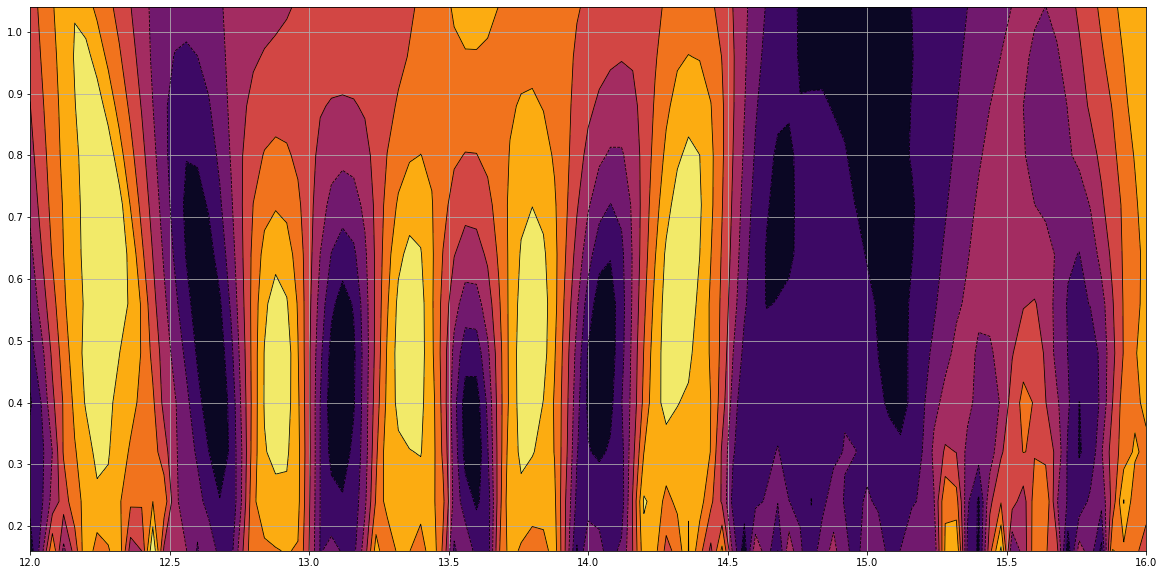

In [14]:
cs = plt.contourf(d2.time.unique(), d2.duration.unique(), d2.pivot('duration', 'time', 'wgof'), cmap='inferno')
plt.contour(cs, colors='k', linewidths=0.8)
plt.show()

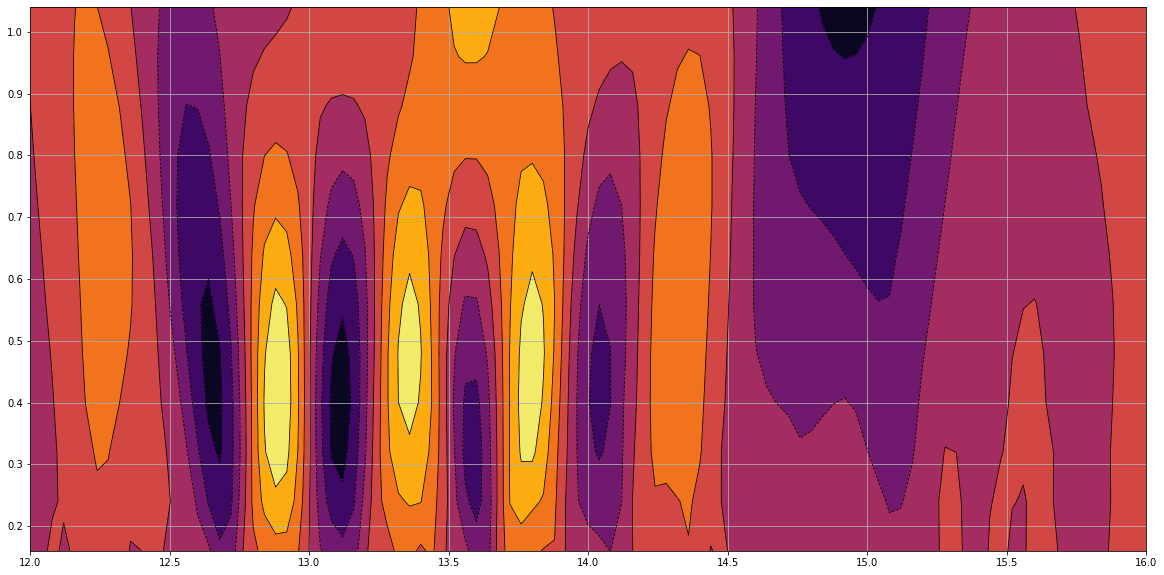

In [15]:
cs = plt.contourf(d2.time.unique(), d2.duration.unique(), d2.pivot('duration', 'time', 'wcoef'), cmap='inferno')
plt.contour(cs, colors='k', linewidths=0.8)
plt.show()

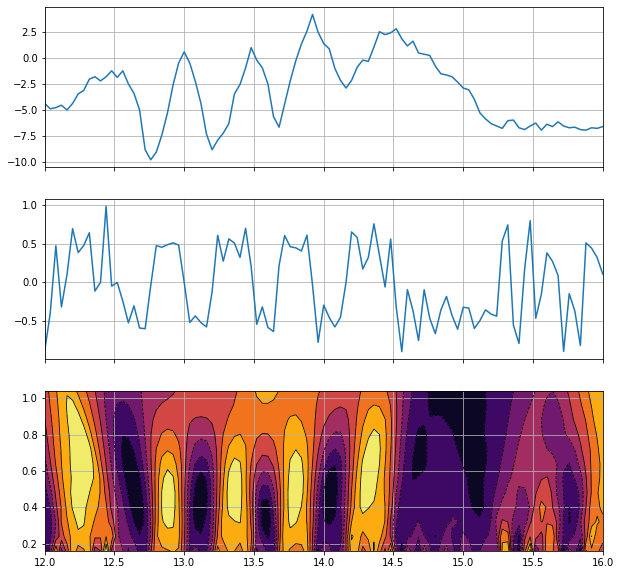

In [16]:
fig, ax = plt.subplots(3,1, figsize=(10,10), sharex=True)
#
ax[0].plot(d2[d2.duration == 0.16]['time'], d2[d2.duration == 0.16]['pitch'])
ax[1].plot(d2[d2.duration == 0.16]['time'], d2[d2.duration == 0.16]['wgof'])
#
cs = ax[2].contourf(d2.time.unique(), d2.duration.unique(), d2.pivot('duration', 'time', 'wgof'), cmap='inferno')
ax[2].contour(cs, colors='k', linewidths=0.8)
plt.show()

Comparison `wgof` / `wcoef`

In [17]:
dresult[['wgof', 'wcoef']].describe()

,wgof,wcoef
count,59616.000000,59616.000000
mean,-0.012101,0.001575
std,0.572566,0.683110
min,-1.000000,-6.288600
25%,-0.571300,-0.196200
50%,-0.014550,-0.003800
75%,0.542300,0.225700
max,1.000000,4.216700


## Predictions

In [18]:
e2 = createNodAnnotations(pyr, 'pitch', nod_threshold=0.945, use_index=True, dresults=dresult)
e2.head()

,tmin,tmax,pitch,wgof,wcoef,prediction
0,0.00,0.80,-2.9221,0.9174,1.3256,no_nod
1,0.80,0.88,NaN,NaN,NaN,no_nod
2,0.88,1.20,-2.6929,0.7787,0.2507,no_nod
3,1.20,1.24,NaN,NaN,NaN,no_nod
4,1.24,1.88,-2.3491,0.9243,0.6636,no_nod


In [19]:
e2.shape

(869, 6)

In [20]:
results = projectTimeIntervalsCharValues(pyr[['time', 'pitch']], e2)
results.head()

,time,pitch,prediction
0,0.00,-6.0161,no_nod
1,0.04,-6.0734,no_nod
2,0.08,-5.6150,no_nod
3,0.12,-5.7296,no_nod
4,0.16,-5.4431,no_nod


We can observe alignment of predictions against gold standard:

In [21]:
# Unlabeled data is considered as 'no nod'
# => adding rows to fill empty data
rlabeled_nods = fillTimeColumnInterval(
    nods[nods.value == 'Nod'][['tmin', 'tmax', 'value']], 
    time_start=0, time_stop=pyr.time.iloc[-1], 
    other_columns={'value':'no_nod'})[['tmin', 'tmax', 'value']]
rlabeled_nods['value'] = rlabeled_nods.value.apply(lambda x: x.lower())

In [22]:
# collapse for more efficient plotting
rlnc = collapse_intervals(rlabeled_nods, 'value')
e2c = collapse_intervals(e2, 'prediction')

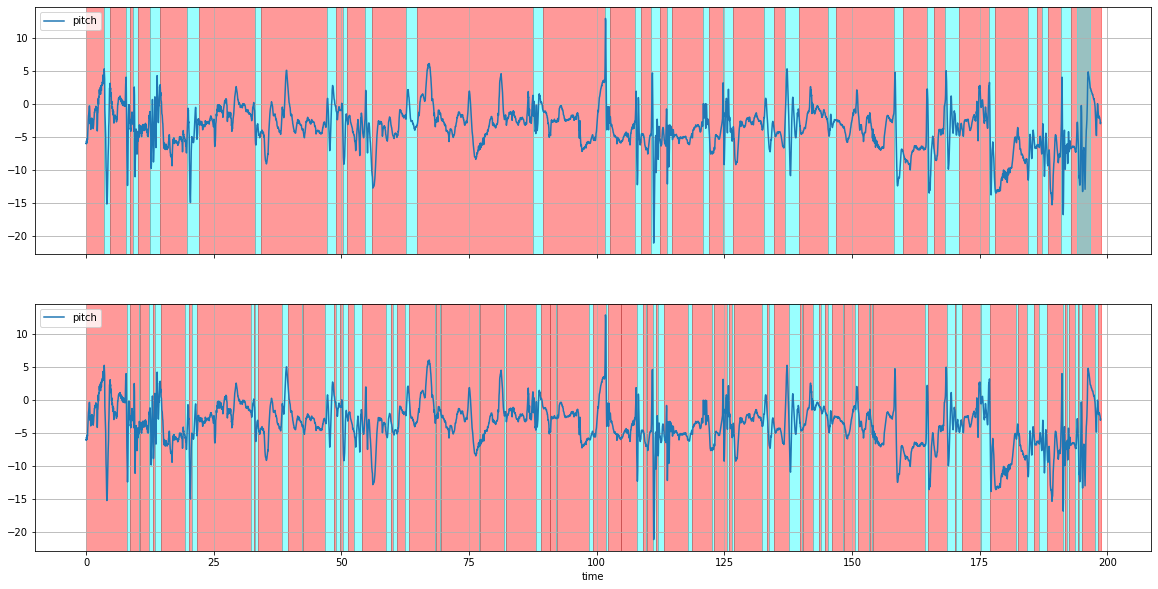

In [23]:
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
# Gold Standard
pyr.set_index('time')[['pitch']].plot(ax=ax[0])
for i, x in rlnc.iterrows():
    color = 'cyan' if x.value == 'nod' else 'red'
    ax[0].axvspan(x.tmin, x.tmax, color = color, alpha=0.4)
# Predictions
pyr.set_index('time')[['pitch']].plot(ax=ax[1])
for i, x in e2c.iterrows():
    color = 'cyan' if x.prediction == 'nod' else 'red'
    ax[1].axvspan(x.tmin, x.tmax, color = color, alpha=0.4)

We can notice that with these parameters, prediction is always much shorter than real analysis.

## Evaluation

In [24]:
results = projectTimeIntervalsCharValues(results, rlabeled_nods, column_name="value")
results.head()


,time,pitch,prediction,value
0,0.00,-6.0161,no_nod,no_nod
1,0.04,-6.0734,no_nod,no_nod
2,0.08,-5.6150,no_nod,no_nod
3,0.12,-5.7296,no_nod,no_nod
4,0.16,-5.4431,no_nod,no_nod


In [25]:
results.value.value_counts()

no_nod    3826
nod       1142
Name: value, dtype: int64

In [26]:
pd.crosstab(results.value, results.prediction)

prediction,no_nod,nod
value,,
no_nod,3276,550
nod,595,547


In [27]:
print(classification_report(results.value, results.prediction, ['no_nod', 'nod']))

              precision    recall  f1-score   support

      no_nod       0.85      0.86      0.85      3826
         nod       0.50      0.48      0.49      1142

    accuracy                           0.77      4968
   macro avg       0.67      0.67      0.67      4968
weighted avg       0.77      0.77      0.77      4968



In [28]:
cohen_kappa_score(results.value, results.prediction, ['no_nod', 'nod'])

0.3399292905710085

## Experiments
* Evolution of accuracy with `nod_threshold`
* Trying various features => see which are the most promising + linear combination of features?
* Evaluating rule of thumb
* Are some 'no_nod' categories more difficult to predict?
* Evolution of accuracy with higher sigmas

In [63]:
def coefs_gradientfill(data:pd.DataFrame, figsize=(20,15), fixed_duration:float=None):
    """
    Input:
    -------
    data: pd.DataFrame
        columns ['time', interest_column, 'wgof', 'wcoef', 'duration']
    
    fixed_duration: float
        if None, then takes min; duration to fix for the wgof plot
    """
    if fixed_duration is None:
        fixed_duration = data.duration.min()
    column = list(set(data.columns) - set(['time', 'wgof', 'duration', 'wcoef', 'tmax', 'tmin']))[0]

    # Creating figure
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    fig.suptitle(f'{column} values and coefficients over timescales', fontsize=24, y = 0.92)
    spec = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,2,2])
    # Creating axes
    ax = [fig.add_subplot(spec[0])]
    ax += [fig.add_subplot(spec[i], sharex=ax[0]) for i in range(1, 4)]
    # Adding data: 
    ax[0].plot(data[data.duration == fixed_duration]['time'], data[data.duration == fixed_duration][column])
    ax[0].set_ylabel(column)
    ax[1].plot(data[data.duration == fixed_duration]['time'], data[data.duration == fixed_duration]['wgof'])
    ax[1].set_ylabel(f"wgof \n duration = {fixed_duration}")
    # Adding heatmaps for computed coefficients
    cs = ax[2].contourf(data.time.unique(), data.duration.unique(), data.pivot('duration', 'time', 'wgof'), cmap='inferno')
    ax[2].contour(cs, colors='k', linewidths=0.8)
    ax[2].set_ylabel("wgof over timescales")
    cs = ax[3].contourf(data.time.unique(), data.duration.unique(), data.pivot('duration', 'time', 'wcoef'), cmap='inferno')
    ax[3].contour(cs, colors='k', linewidths=0.8)
    ax[3].set_ylabel("wcoef over timescales")

    return (fig, ax)

In [54]:
def compare_prediction(data:pd.DataFrame):
    """
    Input:
    -------
    data: pd.DataFrame
        columns ['time', column, 'value', 'prediction'] with value / prediction taking values in ('nod', 'no_nod')
    """
    # Aggregating data
    column = list(set(data.columns) - set(['time', 'prediction', 'value']))[0]
    # Creating Figure
    fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
    fig.suptitle("Comparison manual annotation / prediction", fontsize=24, y = 0.92)
    for i,label in enumerate(['value', 'prediction']):
        df = data.groupby((data[label] != data[label].shift()).cumsum()).agg(**{
            'tmin':pd.NamedAgg(column='time', aggfunc= min),
            'tmax':pd.NamedAgg(column='time', aggfunc= max),
            label:pd.NamedAgg(column=label, aggfunc= pd.unique)
        }).reset_index(drop=True)
        data.set_index('time')[[column]].plot(ax=ax[i])
        for _, x in df.iterrows():
            color = 'cyan' if x[label] == 'nod' else 'red'
            ax[i].axvspan(x.tmin, x.tmax, color = color, alpha=0.4)
    
    return (fig, ax)

In [64]:
# Tests
#_ = coefs_gradientfill(dresult[(dresult.time <= 16) & (dresult.time >=12)])
#_ = compare_prediction(results)

In [60]:
def execute_steps(data:pd.DataFrame, column:str, nods:pd.DataFrame,
                    nod_threshold:float=0.945, smin:float=0.16, smax:float=1.04, step:float=0.08,
                    use_index:bool=False, plot_images:bool=False):
    """Concatenating previous steps for easy parameter testing
    """
    # Computing wavelet coefficients
    dresult = compute2DArrayPredictor2Value(data, column, smin, smax, step, use_index = use_index)
    # Creating predictions
    e2 = createNodAnnotations(data, column, nod_threshold=nod_threshold, use_index=use_index, dresults=dresult)
    # Propagating along index
    results = projectTimeIntervalsCharValues(data[['time', column]], e2)
    # Comparing to Gold Standard
    rlabeled_nods = fillTimeColumnInterval(
                            nods[nods.value == 'Nod'][['tmin', 'tmax', 'value']], 
                            time_start=0, time_stop=pyr.time.iloc[-1], 
                            other_columns={'value':'no_nod'}
                        )[['tmin', 'tmax', 'value']]
    rlabeled_nods['value'] = rlabeled_nods.value.apply(lambda x: x.lower()) # aligning labels
    results = projectTimeIntervalsCharValues(results, rlabeled_nods, column_name="value")

    if plot_images:
        _ = coefs_gradientfill(dresult[(dresult.time <= 16) & (dresult.time >=12)])
        _ = compare_prediction(results)
    
    # Evaluation
    report = classification_report(results.value, results.prediction, ['no_nod', 'nod'], output_dict=True)
    report['kappa'] = cohen_kappa_score(results.value, results.prediction, ['no_nod', 'nod'])
    cm = pd.crosstab(results.value, results.prediction)
    report['confusion_matrix'] = {
        'cm': cm,
        'nods': cm['nod'].sum(),
        'no_nods': cm['no_nod'].sum()
    }
    return report, results

Example of classification_report:
```python
{'no_nod': 
    {'precision': 0.8462929475587704, 'recall': 0.8562467328802927, 'f1-score': 0.8512407431466806, 'support': 3826}, 
'nod': 
    {'precision': 0.4986326344576117, 'recall': 0.478984238178634, 'f1-score': 0.4886109870477892, 'support': 1142}, 
'accuracy': 0.769524959742351, 
'macro avg': {'precision': 0.6724627910081911, 'recall': 0.6676154855294634, 'f1-score': 0.669925865097235, 'support': 4968}, 'weighted avg': {'precision': 0.7663758627033913, 'recall': 0.769524959742351, 'f1-score': 0.767882614832483, 'support': 4968}
}
```

**Evolution of accuracy/scores with nod_threshold**

In [76]:
use_index = True
column = 'pitch'
storage = []
for nod_threshold in [0.5, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.99]:
    print(f"\n##### threshold={nod_threshold}")
    r, _ = execute_steps(pyr, 'pitch', nods, nod_threshold=nod_threshold, use_index=use_index)
    storage.append({
        'nod_threshold': nod_threshold,
        'nod_frames_predicted': r['confusion_matrix']['nods'],
        'kappa_score': r['kappa'],
        'nod_f1': r['nod']['f1-score'],
        'no_nod_f1': r['no_nod']['f1-score']
    })
storage = pd.DataFrame(storage)


##### threshold=0.5
Scale 1 completed, timescale = 0.16s.
Scale 2 completed, timescale = 0.24s.
Scale 3 completed, timescale = 0.32s.
Scale 4 completed, timescale = 0.4s.
Scale 5 completed, timescale = 0.48s.
Scale 6 completed, timescale = 0.56s.
Scale 7 completed, timescale = 0.64s.
Scale 8 completed, timescale = 0.72s.
Scale 9 completed, timescale = 0.8s.
Scale 10 completed, timescale = 0.88s.
Scale 11 completed, timescale = 0.96s.
Scale 12 completed, timescale = 1.04s.

##### threshold=0.7
Scale 1 completed, timescale = 0.16s.
Scale 2 completed, timescale = 0.24s.
Scale 3 completed, timescale = 0.32s.
Scale 4 completed, timescale = 0.4s.
Scale 5 completed, timescale = 0.48s.
Scale 6 completed, timescale = 0.56s.
Scale 7 completed, timescale = 0.64s.
Scale 8 completed, timescale = 0.72s.
Scale 9 completed, timescale = 0.8s.
Scale 10 completed, timescale = 0.88s.
Scale 11 completed, timescale = 0.96s.
Scale 12 completed, timescale = 1.04s.

##### threshold=0.8
Scale 1 completed, time

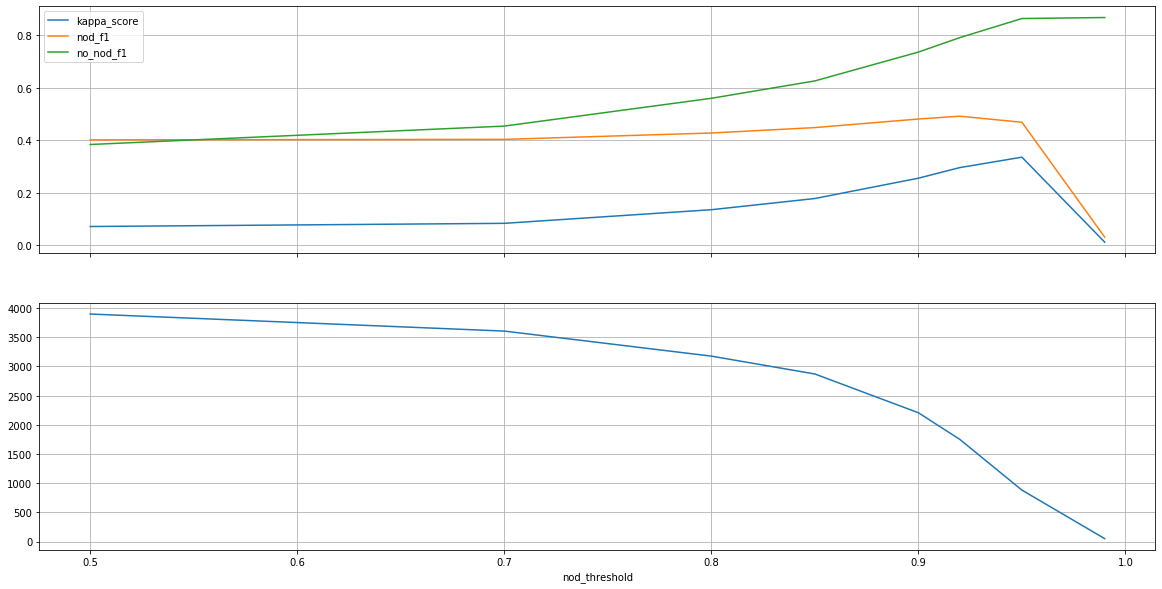

In [77]:
fig, ax = plt.subplots(2,1, sharex=True)
storage.set_index('nod_threshold')[['kappa_score', 'nod_f1', 'no_nod_f1']].plot(ax=ax[0])
storage.set_index('nod_threshold')['nod_frames_predicted'].plot(ax=ax[1])

**Testing other features**

In [ ]:
columns = ['pitch','MOy']

**Changing timescales**

In [79]:
nods_c = nods.copy(deep=True)
nods_c['duration'] = nods_c.tmax - nods_c.tmin
nods_c.groupby(by=['value', 'annot']).agg({
    'duration':['min', 'max', 'mean']
})

duration                 
                                   min    max      mean
value  annot                                           
No_nod Backward                  1.550  2.838  2.194000
       Froncement de sourcils    0.500  3.457  1.673167
       Haussement de sourcils    1.095  1.095  1.095000
       Tilt                      2.133  2.133  2.133000
Nod    Complexe                  0.800  2.550  1.551444
       Nod                       0.860  2.774  1.665737

We can observe from that that nods actually are _much_ longer than what we're looking at?

In [ ]:
use_index = True
column = 'pitch'
storage = []
for (smin, smax) in [(0.16, 1.04), (0.32, 1.5), (0.48, 2.), (0.8, 2.), (0.96, 2.4)]:
    print(f"\n##### timescale interval = ({smin},{smax})")
    r, _ = execute_steps(pyr, 'pitch', nods, nod_threshold=0.945, smin=smin, smax=smax, use_index=use_index)
    storage.append({
        'smin': smin,
        'smax': smax,
        'nod_frames_predicted': r['confusion_matrix']['nods'],
        'kappa_score': r['kappa'],
        'nod_f1': r['nod']['f1-score'],
        'no_nod_f1': r['no_nod']['f1-score']
    })
storage = pd.DataFrame(storage)